Referencia:
https://www.kaggle.com/paoloripamonti/twitter-sentiment-analysis

In [ ]:
!git clone https://github.com/godinezseba/Tarea-2-RedesNeuronales

Cloning into 'Tarea-2-RedesNeuronales'...
remote: Enumerating objects: 2152, done.
remote: Counting objects: 100% (2152/2152), done.
remote: Compressing objects: 100% (2152/2152), done.
remote: Total 35840 (delta 1), reused 2148 (delta 0), pack-reused 33688
Receiving objects: 100% (35840/35840), 797.68 MiB | 35.75 MiB/s, done.
Resolving deltas: 100% (325/325), done.
Checking out files: 100% (36724/36724), done.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Conv1D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from keras.initializers import Constant
from sklearn.metrics import  classification_report
import re

Using TensorFlow backend.


#Cargar datos

In [ ]:
data = pd.read_csv('./Tarea-2-RedesNeuronales/datasets/Parte 2/train_source_tweets.txt', sep='\t', names = ['ID','Tweet'] )

In [ ]:
data.head()

,ID,Tweet
0,692735698349199360,north korea 'planning some kind of rocket laun...
1,525008463819464704,"meet kevin vickers, the hero who shot down the..."
2,505611045897924608,"15 year old who ""swatted"" gamer convicted of d..."
3,693466724822323200,audio recordings reveal cpr started 11 minutes...
4,510922415468449792,awful mt @scclemons:uk aid worker david haines...


In [ ]:
labels = pd.read_csv('./Tarea-2-RedesNeuronales/datasets/Parte 2/train_labels.csv' )

In [ ]:
print(labels['label'].value_counts())

non-rumor     524
false         520
true          514
unverified    368
Name: label, dtype: int64


In [ ]:
labels.head()

,label,id
0,non-rumor,692735698349199360
1,unverified,525008463819464704
2,false,505611045897924608
3,non-rumor,693466724822323200
4,true,510922415468449792


#LSTM Best

In [ ]:
data['Tweet'] = data['Tweet'].apply(lambda x: x.lower())
data['Tweet'] = data['Tweet'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [ ]:
tweet = data['Tweet'].values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
X = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=200) )
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(4, activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])


In [ ]:
Y = pd.get_dummies(labels['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1290, 200) (1290, 4)
(636, 200) (636, 4)


In [ ]:
es = EarlyStopping(
    monitor="val_loss", min_delta=0, patience=2, restore_best_weights=True
)

In [ ]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 200, batch_size=batch_size, verbose = 2, validation_data=(X_test,Y_test),callbacks=[es])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1290 samples, validate on 636 samples
Epoch 1/200
 - 17s - loss: 0.5594 - accuracy: 0.7500 - val_loss: 0.5598 - val_accuracy: 0.7500
Epoch 2/200
 - 16s - loss: 0.5528 - accuracy: 0.7500 - val_loss: 0.5545 - val_accuracy: 0.7500
Epoch 3/200
 - 16s - loss: 0.5337 - accuracy: 0.7502 - val_loss: 0.5236 - val_accuracy: 0.7551
Epoch 4/200
 - 16s - loss: 0.4597 - accuracy: 0.7814 - val_loss: 0.4396 - val_accuracy: 0.7940
Epoch 5/200
 - 16s - loss: 0.3788 - accuracy: 0.8221 - val_loss: 0.3964 - val_accuracy: 0.8125
Epoch 6/200
 - 16s - loss: 0.2935 - accuracy: 0.8826 - val_loss: 0.3467 - val_accuracy: 0.8502
Epoch 7/200
 - 16s - loss: 0.2168 - accuracy: 0.9217 - val_loss: 0.3029 - val_accuracy: 0.8715
Epoch 8/200
 - 16s - loss: 0.1539 - accuracy: 0.9504 - val_loss: 0.2695 - val_accuracy: 0.8833
Epoch 9/200
 - 16s - loss: 0.1190 - accuracy: 0.9628 - val_loss: 0.2596 - val_accuracy: 0.8935
Epoch 10/200
 - 16s - loss: 0.0888 - accuracy: 0.9752 - val_loss: 0.2685 - val_accuracy: 0.8911
Ep

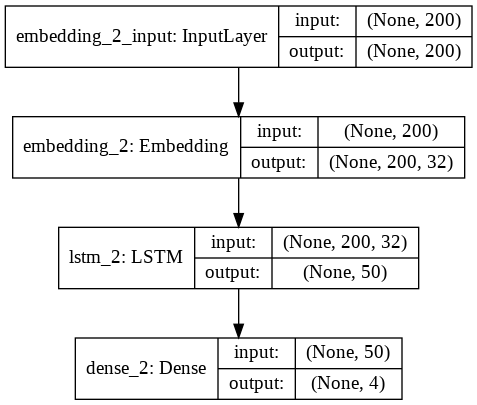

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

#Kaggle

In [ ]:
le = LabelEncoder()

qwer = le.fit_transform(labels['label'])

In [ ]:
test = pd.read_csv('./Tarea-2-RedesNeuronales/datasets/Parte 2/test_source_tweets.txt', sep='\t', names = ['ID','Tweet'] )

In [ ]:
test['Tweet'] = test['Tweet'].apply(lambda x: x.lower())
test['Tweet'] = test['Tweet'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [ ]:
X = tokenizer.texts_to_sequences(test['Tweet'].values)
X = pad_sequences(X, maxlen=28)

In [ ]:
tweet = test['Tweet'].values
encoded_docs = tokenizer.texts_to_sequences(tweet)
X = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
test.head()

,ID,Tweet
0,689719109785907200,death toll from bachakhanuniattack rises to at...
1,531300385248800768,the head of isis abu bakr albaghdadi is said t...
2,652992524504600576,steve jobs was adopted his biological father w...
3,509473920060104704,microsoft to buy mojang report url 2 billion ...
4,651321040119963648,el chapo puts 100 million bounty on donald tru...


In [ ]:
print(X.shape)

(213, 200)


In [ ]:
asd = model.predict_classes(X)

In [ ]:
pred = le.inverse_transform(asd)

In [ ]:
sample = pd.read_csv('./Tarea-2-RedesNeuronales/datasets/Parte 2/sample_submission.csv')

sample['label'] = pred
sample['id'] = test['ID']
sample.to_csv('LTSM_sentiment.csv', header=True, index=False)